# МОДЕЛИРОВАНИЕ ЦЕПНОЙ ЯДЕРНОЙ РЕАКЦИИ
Цепная ядерная реакция — это последовательность единичных ядерных реакций, каждая из которых вызывается частицей, появившейся как продукт реакции на предыдущем шаге последовательности. Примером цепной ядерной реакции является реакция деления ядер тяжёлых элементов, при которой основное число актов деления инициируется нейтронами, полученными при делении ядер в предыдущем поколении. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random


In [2]:
def free_path_length(lambda_param):
    R = random.uniform(0, 1)
    return -(math.log(R) / lambda_param) # l = - ln(R)/lambda

In [3]:
def interaction(absorption_probability, scattering_probability):
    R = random.uniform(0, 1)
    if R < absorption_probability:
        return 'absorption' #поглощение
    elif R < absorption_probability + scattering_probability:
        return 'scattering' #рассеяние
    else:
        return 'fission' #деление

In [176]:
def move_particle(position, angels, distance):
    angle_theta = angels[0] #угол в плоскости XY, определяющий направление движения частицы в горизонтальной плоскости
    angle_phi = angels[1] #угол относительно вертикальной оси, определяющий наклон частицы в пространстве
    new_x = position[0] + distance * math.sin(angle_phi) * math.cos(angle_theta)
    new_y = position[1] + distance * math.sin(angle_phi) * math.sin(angle_theta) #новые координаты определяются как смещение относительно предыдущего положения
    new_z = position[2] + distance * math.cos(angle_phi)
    return new_x, new_y, new_z

In [131]:
def get_angels():
    return random.uniform(0, 2 * math.pi), random.uniform(0, math.pi)

In [350]:
def simulate_particles_in_sphere_with_visualization(lambda_param, num_particles, radius, max_particle_count, max_interactions, fission_particles, absorption_probability, scattering_probability, need_visualisation=False):
    particles = [{'position': (0, 0, 0), 'alive': True, 'angels': get_angels()} for _ in range(num_particles)] #создаем частицы
    interactions = 0
    particles_inside_history = [num_particles]

    while len(particles) > 0 and interactions < max_interactions: #пока есть живые частицы и пока количество взаимодействий меньше, чем максимальное количество взаимодействий
        interaction_num = 0  # Количество взаимодействий в этом цикле
        newly_created_particles = []  # Хранение новых частиц от деления

        for i, particle in enumerate(particles):
            if particle['alive']:
                # Предположим, что всякий раз, когда частица взаимодействует, это учитывается как одно взаимодействие
                if interaction_num >= max_interactions:
                    break
                distance = free_path_length(lambda_param) #расстояние которое частица пройдет до следующего взаимодействия
                new_position = move_particle(particle['position'], particle['angels'], distance) #перемещаем частицу
                if math.sqrt(new_position[0] ** 2 + new_position[1] ** 2 + new_position[2] ** 2) > radius: #Если частица выходит за пределы шара, она помечается как мертвая
                # if new_position[0] > radius or new_position[1] > radius or new_position[2] > radius: #Если частица выходит за пределы шара, она помечается как мертвая
                    particle['alive'] = False
                else:
                    interaction_type = interaction(absorption_probability, scattering_probability) #определяется тип взаимодействия
                    if interaction_type == 'absorption':
                        particle['alive'] = False
                    elif interaction_type == 'fission':
                        particle['alive'] = False
                        for _ in range(fission_particles):
                            if len(newly_created_particles) >= max_particle_count:
                                break
                            newly_created_particles.append({'position': new_position, 'alive': True, 'angels': get_angels()})
                interaction_num += 1

        particles = [p for p in particles + newly_created_particles if p['alive']]
        if len(particles) > max_particle_count:
            print(
                f"Моделирование остановлено: число частиц превысило {max_particle_count} после {interactions} взаимодействий.")
            break
        particles_inside_history.append(len(particles))
        interactions += 1

    # Визуализация
    if need_visualisation:
        plt.figure(figsize=(10, 6))
        plt.plot(particles_inside_history, marker='o')
        plt.xlabel('Количество взаимодействий')
        plt.ylabel('Число частиц внутри шара')
        plt.title('Имитационная модель прохождения частиц в шаре')
        plt.grid(True)
        plt.show()

    print(f"Оставшиеся частицы после {interactions} взаимодействий: {len(particles)}")

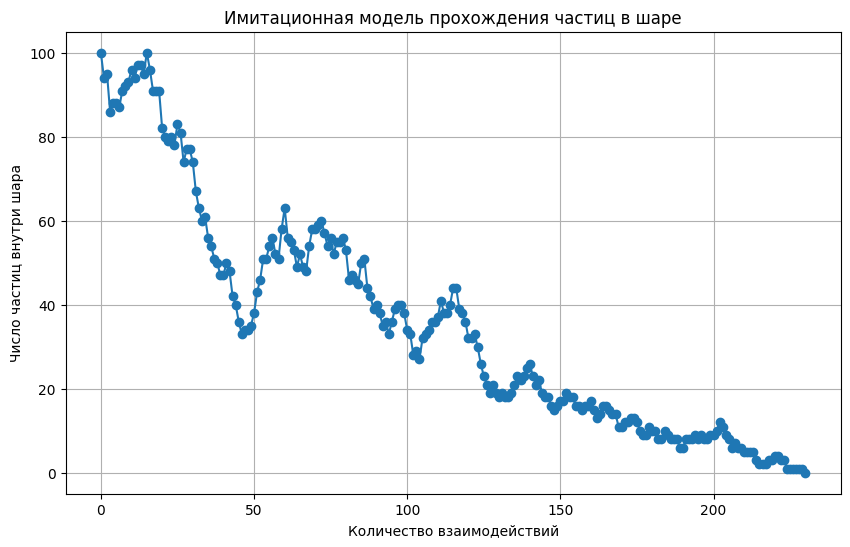

Оставшиеся частицы после 230 взаимодействий: 0


In [335]:
lambda_param = 1  # Предполагаемая константа распада для данного материала
num_particles = 100  # Начальное количество частиц
max_interactions = 1000  # Ограничение на максимальное количество взаимодействий
absorption_probability = 0.1  # Вероятность поглощения частицы
scattering_probability = 0.8  # Вероятность рассеяния частицы
fission_particles = 2  # Количество новых частиц, образующихся при делении
radius = 5  # Радиус шара в единицах
max_particle_count = 10000  # Параметр максимального количества частиц, после которого симуляция будет остановлена
simulate_particles_in_sphere_with_visualization(lambda_param, num_particles, radius, max_particle_count, max_interactions, fission_particles, absorption_probability, scattering_probability, need_visualisation=True)

In [359]:
lambda_params = [1, 2, 3, 5, 10]  # Предполагаемая константа распада для данного материала
num_particles = 100  # Начальное количество частиц
max_interactions = 1000  # Ограничение на максимальное количество взаимодействий
absorption_probability = 0.1  # Вероятность поглощения частицы
scattering_probability = 0.8  # Вероятность рассеяния частицы
fission_particles = 2  # Количество новых частиц, образующихся при делении
radius = 5  # Радиус шара в единицах
max_particle_count = 10000  # Параметр максимального количества частиц, после которого симуляция будет остановлена
for lambda_param in lambda_params:
    simulate_particles_in_sphere_with_visualization(lambda_param, num_particles, radius, max_particle_count, max_interactions, fission_particles, absorption_probability, scattering_probability, need_visualisation=False)

Оставшиеся частицы после 211 взаимодействий: 0
Оставшиеся частицы после 294 взаимодействий: 0
Оставшиеся частицы после 353 взаимодействий: 0
Оставшиеся частицы после 1000 взаимодействий: 39
Оставшиеся частицы после 379 взаимодействий: 0


In [369]:
lambda_param = 1  # Предполагаемая константа распада для данного материала
num_particles = 100  # Начальное количество частиц
max_interactions = 1000  # Ограничение на максимальное количество взаимодействий
absorption_probability = 0.1  # Вероятность поглощения частицы
scattering_probability = 0.8  # Вероятность рассеяния частицы
fission_particles = 2  # Количество новых частиц, образующихся при делении
radiuses = [5, 10, 15, 20, 25]  # Радиус шара в единицах
max_particle_count = 10000  # Параметр максимального количества частиц, после которого симуляция будет остановлена
for radius in radiuses:
    simulate_particles_in_sphere_with_visualization(lambda_param, num_particles, radius, max_particle_count, max_interactions, fission_particles, absorption_probability, scattering_probability, need_visualisation=False)

Оставшиеся частицы после 159 взаимодействий: 0
Оставшиеся частицы после 578 взаимодействий: 0
Оставшиеся частицы после 716 взаимодействий: 0
Оставшиеся частицы после 756 взаимодействий: 0
Оставшиеся частицы после 1000 взаимодействий: 4
